In [3]:
%matplotlib widget

import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
import math
import cv2
import csv
import pandas as pd
#import plotly.graph_objects as go

import vis_utils
import matrix_utils
import dist_utils
from ProcessResults import ProcessResults

from GetLandmarks import GetLandmarks


In [4]:
IMAGE = 'test5.png'
#IMAGE = 'test14.jpg'
patient_img = cv2.imread('./test_img/' + IMAGE)
model_to_use = 'MEE' #'MEE' or 'iBUG'

In [5]:
landmarks_mee = GetLandmarks(patient_img, 'MEE')
landmarks_ibug = GetLandmarks(patient_img, 'iBUG')

Pupil cannot be detected -- Eye is closed
Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!
Pupil cannot be detected -- Eye is closed
Successfully predicted landmarks!


In [6]:
results_mee = ProcessResults(landmarks_mee)
results_ibug = ProcessResults(landmarks_ibug)

new_shape_mee = np.transpose(results_mee._landmarks)
new_shape_ibug = np.transpose(results_ibug._landmarks)

In [7]:
bbox_x_mee = [landmarks_mee._boundingbox[0], landmarks_mee._boundingbox[2]]
bbox_y_mee = [landmarks_mee._boundingbox[1], landmarks_mee._boundingbox[3]]

bbox_x_ibug = [landmarks_ibug._boundingbox[0], landmarks_ibug._boundingbox[2]]
bbox_y_ibug = [landmarks_ibug._boundingbox[1], landmarks_ibug._boundingbox[3]]

In [8]:
lefteye_mee = plt.Circle((tuple(landmarks_mee._lefteye[:2])), landmarks_mee._lefteye[2], color='b', fill=False)
righteye_mee = plt.Circle((tuple(landmarks_mee._righteye[:2])), landmarks_mee._righteye[2], color='b', fill=False)

lefteye_ibug = plt.Circle((tuple(landmarks_ibug._lefteye[:2])), landmarks_ibug._lefteye[2], color='r', fill=False)
righteye_ibug = plt.Circle((tuple(landmarks_ibug._righteye[:2])), landmarks_ibug._righteye[2], color='r', fill=False)

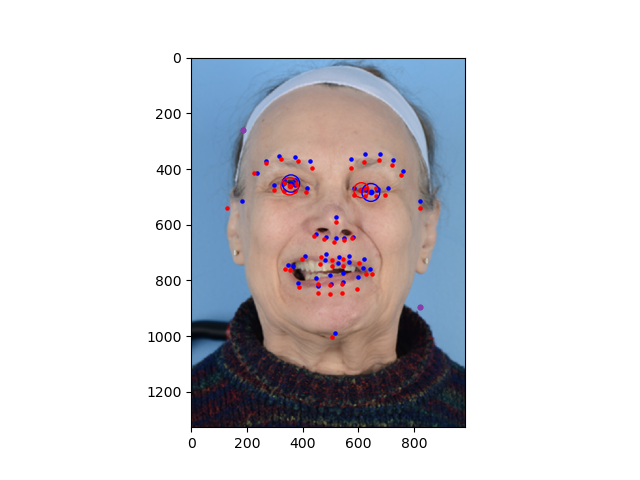

In [9]:
plt.figure()

img = plt.imread('./test_img/' + IMAGE)
implot = plt.imshow(img)

# Two landmark models
plt.scatter(x=new_shape_mee[0], y=new_shape_mee[1], c='b', s=5)
plt.scatter(x=new_shape_ibug[0], y=new_shape_ibug[1], c='r', s=5)

# Add numbers to the points
'''
for i, n in enumerate(range(51)):
    plt.annotate(n, (new_shape_mee[0][i], new_shape_mee[1][i]))
'''

# Two bounding boxes
plt.scatter(x=bbox_x_mee, y=bbox_y_mee, c='#593da6', s=10)
plt.scatter(x=bbox_x_ibug, y=bbox_y_ibug, c='#8a3da6', s=10)

# Two pupils
plt.scatter(x=[landmarks_mee._lefteye[0],landmarks_mee._righteye[0]], 
            y=[landmarks_mee._lefteye[1],landmarks_mee._righteye[1]], 
            c='b', s=10)
plt.scatter(x=[landmarks_ibug._lefteye[0],landmarks_ibug._righteye[0]], 
            y=[landmarks_ibug._lefteye[1],landmarks_ibug._righteye[1]], 
            c='r', s=10)

# Two iris
#'''
plt.gca().add_patch(lefteye_mee)
plt.gca().add_patch(righteye_mee)
plt.gca().add_patch(lefteye_ibug)
plt.gca().add_patch(righteye_ibug)
#'''
plt.show()

In [10]:
results_mee = ProcessResults(landmarks_mee)

In [11]:
results_mee.scale_results()

Distances and features have successfully scaled by pixel scale.
Pixel Scale = 0.1868253968253968 (mm/pixel)


In [12]:
results_mee.scale_results()

Distances and features already scaled. No action was performed.
Pixel Scale = 0.1868253968253968 (mm/pixel)


In [13]:
results_mee.save_results() 

In [14]:
dists_df = pd.read_csv('dists.csv')
dists_df

,dist,value
0,A,119.601094
1,Bl,21.922610
2,Br,22.612795
3,C,32.915219
4,D,21.798581
5,E,21.871548
6,F,77.071987
7,G,74.660071
8,H,43.445237
9,I,40.130945


In [15]:
features_df = pd.read_csv('features.csv')
features_df

,feature,value
0,f0,0.462911
1,f1,1.025200
2,f2,3.264573
3,f3,1.017281
4,f4,0.008079
5,f5,0.017895
6,f6,0.057039
7,f7,1.899728
8,f8,1.031483
9,f9,1.003347


In [16]:
results_mee._features_arr

array([ 0.46291116,  1.0251998 ,  3.2645733 ,  1.0172813 ,  0.0080795 ,
        0.01789502,  0.05703929,  1.8997276 ,  1.0314828 ,  1.0033474 ,
        1.0825869 ,  1.5980794 ,  1.653665  ,  1.55348   ,  2.908028  ,
        1.0323054 ,  1.0534271 ,  1.7528332 ,  0.26762977,  0.33248153,
        0.38715276,  1.4404007 ,  4.367963  , -3.6168985 ,  1.0094373 ,
        0.7782579 ,  0.75571954,  0.27520835,  0.10890897], dtype=float32)